<a href="https://colab.research.google.com/github/bose9999/BritishAirwaysInsights/blob/master/British_Airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | It seems that there is a race t...
1,Not Verified | As a Spanish born individual l...
2,✅ Trip Verified | A rather empty and quiet fl...
3,✅ Trip Verified | Easy check in and staff mem...
4,✅ Trip Verified | Being a silver flyer and bo...


In [ ]:
df.reviews=df['reviews'].str.split('|',expand=True)[1]

In [ ]:
df

,reviews
1,As a Spanish born individual living in Engla...
2,"A rather empty and quiet flight to Tel Aviv,..."
3,Easy check in and staff member was polite an...
4,Being a silver flyer and booking a flight th...
5,I find BA incredibly tacky and constantly lo...
...,...
995,Gatwick to Barbados in December 2017. On a 9...
996,London Heathrow to Dallas. The aircraft was ...
997,Decided to go in Club Europe for this relativ...
998,BA used to be a byword for quality and servic...


DATA PREPROCESSING

data cleaning, tokenization, Parts of speech tagging(POS), removing stopwords, obtaining stemwords

In [ ]:
import re 


In [ ]:
#defining fun to clean text
def cleaning(review):
  #removal of special symbols
   review = re.sub('[^A-Za-z]+', ' ', str(review))
   return review
#applying the cleaning function to the review column
df['Reviews']=df['reviews'].apply(cleaning)
df.head()


,reviews,Reviews
1,As a Spanish born individual living in Engla...,As a Spanish born individual living in Englan...
2,"A rather empty and quiet flight to Tel Aviv,...",A rather empty and quiet flight to Tel Aviv v...
3,Easy check in and staff member was polite an...,Easy check in and staff member was polite and...
4,Being a silver flyer and booking a flight th...,Being a silver flyer and booking a flight thr...
5,I find BA incredibly tacky and constantly lo...,I find BA incredibly tacky and constantly loo...


In [ ]:
df.drop(['reviews'],axis=1,inplace=True)

In [ ]:
df

,Reviews
1,As a Spanish born individual living in Englan...
2,A rather empty and quiet flight to Tel Aviv v...
3,Easy check in and staff member was polite and...
4,Being a silver flyer and booking a flight thr...
5,I find BA incredibly tacky and constantly loo...
...,...
995,Gatwick to Barbados in December On a hour fli...
996,London Heathrow to Dallas The aircraft was ol...
997,Decided to go in Club Europe for this relativ...
998,BA used to be a byword for quality and servic...


In [ ]:
import nltk

#tokenizing using punkt
#Punkt Sentence Tokenizer. This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. It must be trained on a large collection of plaintext in the target language before it can be used.
nltk.download('punkt')
from nltk.tokenize import word_tokenize


from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['Reviews'].apply(token_stop_pos)
df.head()

,Reviews,POS tagged
1,As a Spanish born individual living in Englan...,"[(Spanish, a), (born, v), (individual, a), (li..."
2,A rather empty and quiet flight to Tel Aviv v...,"[(rather, r), (empty, a), (quiet, a), (flight,..."
3,Easy check in and staff member was polite and...,"[(Easy, a), (check, n), (staff, n), (member, n..."
4,Being a silver flyer and booking a flight thr...,"[(silver, n), (flyer, n), (booking, v), (fligh..."
5,I find BA incredibly tacky and constantly loo...,"[(find, v), (BA, a), (incredibly, r), (tacky, ..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Reviews,POS tagged,Lemma
1,As a Spanish born individual living in Englan...,"[(Spanish, a), (born, v), (individual, a), (li...",Spanish bear individual living England use B...
2,A rather empty and quiet flight to Tel Aviv v...,"[(rather, r), (empty, a), (quiet, a), (flight,...",rather empty quiet flight Tel Aviv friendly ...
3,Easy check in and staff member was polite and...,"[(Easy, a), (check, n), (staff, n), (member, n...",Easy check staff member polite helpful make ...
4,Being a silver flyer and booking a flight thr...,"[(silver, n), (flyer, n), (booking, v), (fligh...",silver flyer book flight BA Dublin would thi...
5,I find BA incredibly tacky and constantly loo...,"[(find, v), (BA, a), (incredibly, r), (tacky, ...",find BA incredibly tacky constantly look way...


In [ ]:
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.9/401.9 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 KB 55.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 60.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 102.1 MB/s eta 0:00:00
     ━━━━━━━━━

In [ ]:
from flair.data import Sentence
from flair.models import TextClassifier

# Load a pre-trained sentiment classifier
classifier = TextClassifier.load('en-sentiment')

# Define a function that applies the classifier to a given text
def flair_sentiment_analysis(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    return sentence.labels[0].value

# Apply the function to lemmatized column of reviews
df['Sentiment'] = df['Lemma'].apply(flair_sentiment_analysis)

2023-01-20 18:25:26,103 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


In [ ]:
df.head()

,Reviews,POS tagged,Lemma,Sentiment
1,As a Spanish born individual living in Englan...,"[(Spanish, a), (born, v), (individual, a), (li...",Spanish bear individual living England use B...,NEGATIVE
2,A rather empty and quiet flight to Tel Aviv v...,"[(rather, r), (empty, a), (quiet, a), (flight,...",rather empty quiet flight Tel Aviv friendly ...,NEGATIVE
3,Easy check in and staff member was polite and...,"[(Easy, a), (check, n), (staff, n), (member, n...",Easy check staff member polite helpful make ...,NEGATIVE
4,Being a silver flyer and booking a flight thr...,"[(silver, n), (flyer, n), (booking, v), (fligh...",silver flyer book flight BA Dublin would thi...,NEGATIVE
5,I find BA incredibly tacky and constantly loo...,"[(find, v), (BA, a), (incredibly, r), (tacky, ...",find BA incredibly tacky constantly look way...,NEGATIVE


In [ ]:
flair_counts = df['Sentiment'].value_counts()
flair_counts

NEGATIVE    719
POSITIVE    280
Name: Sentiment, dtype: int64

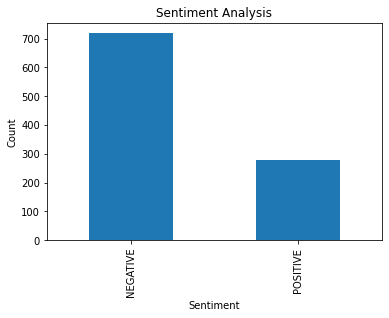

In [ ]:
import matplotlib.pyplot as plt

# Get the counts for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Create a bar chart
sentiment_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')

# Show the chart
plt.show()


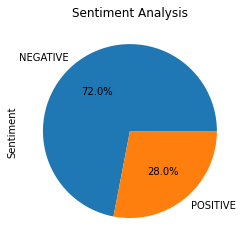

In [ ]:
import matplotlib.pyplot as plt

# Get the counts for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Create a pie chart
sentiment_counts.plot(kind='pie',autopct='%1.1f%%')

# Add labels and title
plt.title('Sentiment Analysis')

# Show the chart
plt.show()


In [ ]:
df.to_csv("data.csv")

In [ ]:
!pip install python-pptx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 40.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 21.1 MB/s eta 0:00:00
  Created wheel for python-pptx: filename=python_pptx-0.6.21-py3-none-any.whl size=470952 sha256=1fab1b0a185f07d863a34e7352c06b1767decccef9e4fb20ca3f306e44bc7320
  Stored in directory: /root/.cache/pip/wheels/b0/38/58/8530ed1681bfee42349acf166867cc9fb369517b2fce83e599
Successfully built python-pptx


In [ ]:
from datetime import date
from pptx import Presentation
from pptx.chart.data import ChartData
from pptx.enum.chart import XL_CHART_TYPE
from pptx.util import Inches

# Create a new PowerPoint presentation
prs = Presentation()

# Add a title slide

title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
title.text = "British Airways"

# Add subtitle
subtitle = slide.shapes.add_textbox(left=Inches(1.5), top=Inches(1), width=Inches(5), height=Inches(0.5))
subtitle.text = "Web scraping to gain company insights"

# Add today's date
today = slide.shapes.add_textbox(left=Inches(5.5), top=Inches(1), width=Inches(1.5), height=Inches(0.5))
today.text = str(date.today())


# Add a slide
blank_slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(blank_slide_layout)
x, y, cx, cy = Inches(2), Inches(2), Inches(6), Inches(4.5)
chart_data = ChartData()
chart_data.categories = ['Positive', 'Negative']
chart_data.add_series('Sentiment', (sentiment_counts['POSITIVE'], sentiment_counts['NEGATIVE']))
chart = slide.shapes.add_chart(
    XL_CHART_TYPE.PIE, x, y, cx, cy, chart_data
).chart


# Save the presentation
prs.save('British_Airways_Insights.pptx')
